# 4.2

## b)

r1/b1=2500.0 r2/a2=1000.0 True
r2/b2=1600.0 r1/a1=1666.6666666666667 True
x1=0 x2=1000.0
x1=1666.6666666666667 x2=0
x1=-1142.8569428571432 x2=-1785.714165714286


<ipython-input-31-b71b5e0e6041>:30: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


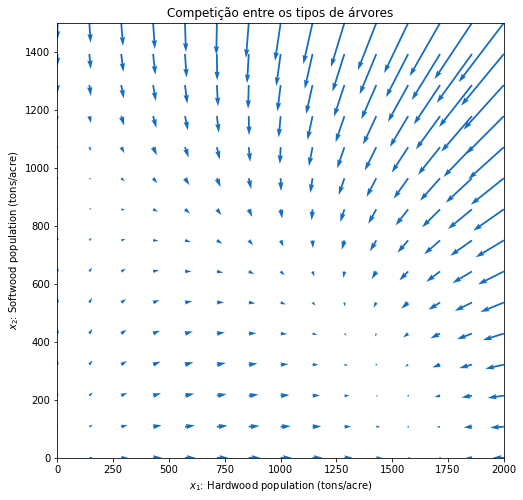

In [31]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)

a1, a2 = .0003, .0004
b1, b2 = .0002, .00025
r1, r2 = .5, .4

maxx2 = 1500#r1/b1*1.25
maxx1 = 2000#r1/a1*1.25

x1, x2 = np.meshgrid(np.linspace(0, maxx1, 15), np.linspace(0, maxx2, 15))

#f1 = r1 - a1*x1 - b1*x2
#f2 = r2 - a2*x2 - b2*x1

f1 = r1*x1 - a1*x1**2 - b1*x1*x2
f2 = r2*x2 - a2*x2**2 - b2*x1*x2

print(f'r1/b1={r1/b1}', f'r2/a2={r2/a2}', r1/b1 > r2/a2)
print(f'r2/b2={r2/b2}', f'r1/a1={r1/a1}', r2/b2 <= r1/a1)

print(f'x1=0', f'x2={r2/a2}')
print(f'x1={r1/a1}', 'x2=0')
print(f'x1={r1*a2 - r2*b1/(a1*a2 - b1*b2)}', f'x2={r2*a1 - r1*b2/(a1*a2 - b1*b2)}')

#plt.quiver(x1, x2, f1, f2)
plt.quiver(x1, x2, f1, f2, color='#156dbd')

ax = plt.axes()
ax.set_title("Competição entre os tipos de árvores")
ax.set_xlabel('$x_1$: Hardwood population (tons/acre)')
ax.set_ylabel('$x_2$: Softwood population (tons/acre)')
ax.set_xlim([0, maxx1])
ax.set_ylim([0, maxx2])

plt.show()

## Testes, favor ignorar abaixo

In [1]:
from sympy import solve, var, symbols, diff, N, simplify, Eq
from sympy.plotting import plot, plot3d

In [2]:
x1 = var('x1', real=True)
x2 = var('x2', real=True)
α = var('alpha', real=True)

e1 = 5/100 * (1-x1/150_000) - α*x2
e2 = 8/100 * (1-x2/400_000) - α*x1

In [3]:
s = solve([e1, e2], [x1, x2], dict=True)[0]
s

{x2: 400000.0*(1875000.0*alpha - 1.0)/(15000000000000.0*alpha**2 - 1.0),
 x1: 150000.0*(8000000.0*alpha - 1.0)/(15000000000000.0*alpha**2 - 1.0)}

In [4]:
dx1dα = diff(s[x1], α)
dx1dα

-2.0e-8*alpha*(8000000.0*alpha - 1.0)/(alpha**2 - 6.66666666666667e-14)**2 + 1200000000000.0/(15000000000000.0*alpha**2 - 1.0)

In [5]:
sx1α = dx1dα*α/s[x1]
sx1α.subs({α: 1e-7})

-3.64705882352941